###**Mounting Google Drive**

In [2285]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Import Libraries**

In [2286]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2287]:
from numpy.random import seed
seed(42)
tf.random.set_seed(42)

In [2288]:
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_test,y_pred,uniqueclassLabel, title="CMatrix"):
  cm = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=uniqueclassLabel)
  plt.figure(figsize=(5,4))
  plt.title(title)
  #ax = plt.subplot()
  sns.heatmap(cm, annot=True,cmap='Blues',
              yticklabels=uniqueclassLabel,xticklabels=uniqueclassLabel,fmt='3g')

###**Import Utility File**

In [2289]:
import sys
path = "/content/drive/MyDrive/Colab Notebooks/Project_Dissertation"
sys.path.insert(0,path + "/Code")
import morningStarUtilities

### **Import Training Data**

In [2290]:
# uploaded = files.upload()
# train_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_train_withoutM60.csv']))

In [2291]:
train_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")

### **Import Testing Data**

In [2292]:
# uploaded = files.upload()
# test_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_test_withoutM60.csv']))

In [2293]:
test_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv").set_index("SecId")

### **Defining Training, Testing varibales**

In [2294]:
imp_features = ['SustainabilityRank','GBRReturnM1','GBRReturnM3','GBRReturnM0','GBRReturnM36','OngoingCostActual','TransactionFeeActual','FundTNAV',
'AverageMarketCapital','MorningstarRiskM255','AlphaM36','BetaM36','StandardDeviationM36','SharpeM36','Size','Style']
X_train = train_df[imp_features]
y_train = train_df[['StarRatingM255']]

X_test = test_df[imp_features]
y_test = test_df['StarRatingM255']

In [2295]:
y_train = y_train.astype('string')

In [2296]:
from sklearn.preprocessing import OneHotEncoder
y_train_cat = OneHotEncoder().fit_transform(y_train[["StarRatingM255"]]).toarray()
y_train_cat.shape

(886, 5)

In [2297]:
X_train.shape[1], y_train.shape, y_train_cat.shape

(16, (886, 1), (886, 5))

In [2298]:
X_test.shape,y_test.shape

((296, 16), (296,))

### **Scaling the Data**

In [2299]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Verify the Training and Testing distribution as per Target Variable**

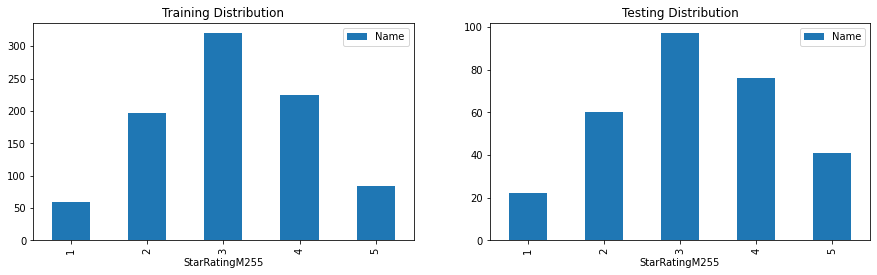

In [2300]:
morningStarUtilities.displayBarSubPlots([train_df,test_df],["Training Distribution", "Testing Distribution"],
                   "StarRatingM255")

### **Creating runtime variables**

In [2301]:
unique_class_label = list(train_df.StarRatingM255.unique())
unique_class_label.sort()
unique_class_label

[1, 2, 3, 4, 5]

### **Defining Neural Network Model**

In [2302]:
# Number of Hidden Layers
round((X_train.shape[1] + len(unique_class_label))/2) + 1

11

### Method 1 - Using Scikit Learn - KerasClassifier


In [2303]:
# def baseline_model():    
#   network = Sequential()
#   network.add(tf.keras.layers.Dense(units=11,activation ='relu', input_dim = X_train.shape[1] ))
#   network.add(tf.keras.layers.Dropout(0.2))
#   network.add(tf.keras.layers.Dense(units=11,activation ='relu'))
#   network.add(tf.keras.layers.Dropout(0.2))
#   network.add(tf.keras.layers.Dense(units=11,activation ='relu'))
#   network.add(tf.keras.layers.Dropout(0.2))
#   network.add(tf.keras.layers.Dense(5,activation='softmax'))
#   network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#   return network

In [2304]:
# from keras.wrappers.scikit_learn import KerasClassifier
# estimator = KerasClassifier(build_fn = baseline_model, epochs = 500, batch_size = 10, verbose = -1)

In [2305]:
# skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# results = cross_val_score(estimator, X_train_scaled, y_train, cv = skf)

# print(results)
# print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [2306]:
# y_pred = estimator.predict(X_test_scaled)

In [2307]:
# plot_conf_matrix(y_test,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
# print("Accuracy Score for " +  estimator.__class__.__name__ + "  " 
#         + str(accuracy_score(y_test,y_pred)) )
# print("F1 Score for " + estimator.__class__.__name__ + "  " + 
#         str(f1_score(y_test, y_pred, average='weighted')))

### Method 2 - Using Sequential Model

In [2308]:
model = Sequential()
model.add(tf.keras.layers.Dense(units=11,activation ='relu', input_shape = (16,) ))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=11,activation ='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=6,activation ='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=5,activation='softmax'))
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [2309]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 11)                187       
_________________________________________________________________
dense_189 (Dense)            (None, 11)                132       
_________________________________________________________________
dropout_94 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 6)                 72        
_________________________________________________________________
dropout_95 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_191 (Dense)            (None, 5)                 35        
Total params: 426
Trainable params: 426
Non-trainable params: 0
_______________________________________________________

In [2310]:
# Handling Imbalanced Classes using class_weight

class_wt = {0: 2.25,
                1: 1.15,
                2: 1.05,
                3: 1.15,
                4: 2.25}

In [2311]:
history = model.fit(X_train_scaled,y_train_cat,validation_split=0.25,
                    epochs=250, verbose=1,batch_size=15,class_weight=class_wt)

Epoch 1/250
45/45 [==============================] - 1s 7ms/step - loss: 2.1142 - accuracy: 0.2214 - val_loss: 1.6162 - val_accuracy: 0.3198
Epoch 2/250
45/45 [==============================] - 0s 3ms/step - loss: 2.0814 - accuracy: 0.2711 - val_loss: 1.5909 - val_accuracy: 0.3153
Epoch 3/250
45/45 [==============================] - 0s 3ms/step - loss: 2.0590 - accuracy: 0.3117 - val_loss: 1.5728 - val_accuracy: 0.3198
Epoch 4/250
45/45 [==============================] - 0s 3ms/step - loss: 2.0275 - accuracy: 0.3298 - val_loss: 1.5629 - val_accuracy: 0.3468
Epoch 5/250
45/45 [==============================] - 0s 3ms/step - loss: 2.0049 - accuracy: 0.3404 - val_loss: 1.5493 - val_accuracy: 0.3559
Epoch 6/250
45/45 [==============================] - 0s 4ms/step - loss: 2.0133 - accuracy: 0.3524 - val_loss: 1.5384 - val_accuracy: 0.3649
Epoch 7/250
45/45 [==============================] - 0s 3ms/step - loss: 1.9860 - accuracy: 0.3645 - val_loss: 1.5253 - val_accuracy: 0.3649
Epoch 8/250
4

### Plot Loss and Accuracy

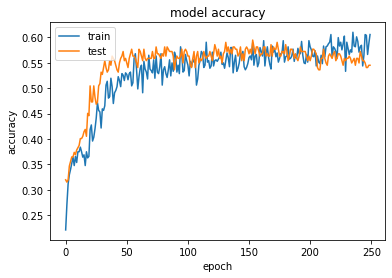

In [2312]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

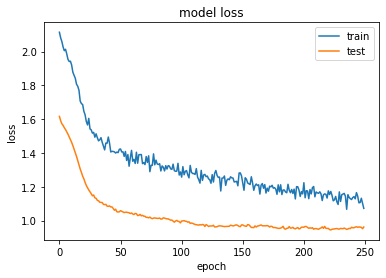

In [2313]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [2314]:
y_pred = model.predict(X_test_scaled)

In [2315]:
y_pred

array([[3.2859614e-01, 4.9043036e-01, 1.8050055e-01, 4.7299737e-04,
        2.4561689e-18],
       [7.8451060e-34, 7.5720240e-16, 5.0062488e-05, 3.0900383e-02,
        9.6904951e-01],
       [5.8741912e-02, 4.6043828e-01, 4.4049177e-01, 4.0327810e-02,
        1.8027976e-07],
       ...,
       [3.2136846e-02, 4.1759324e-01, 4.8511007e-01, 6.5157287e-02,
        2.5407548e-06],
       [7.8096226e-02, 5.0484908e-01, 4.0248093e-01, 1.4573727e-02,
        2.9153271e-10],
       [4.9167671e-20, 1.3553197e-08, 2.2409333e-02, 3.4261683e-01,
        6.3497376e-01]], dtype=float32)

In [2316]:
y_pred = np.argmax(y_pred, axis=1)

In [2317]:
y_pred = y_pred + 1 # Ratings are from 1 to 5

In [2318]:
y_pred

array([2, 5, 2, 3, 3, 3, 3, 4, 3, 5, 4, 3, 3, 5, 3, 2, 1, 4, 3, 5, 5, 3,
       2, 2, 5, 3, 4, 3, 4, 5, 1, 2, 4, 3, 3, 1, 2, 5, 2, 3, 4, 1, 5, 3,
       4, 4, 2, 4, 2, 2, 3, 2, 4, 3, 3, 3, 1, 5, 2, 5, 3, 4, 5, 5, 2, 3,
       3, 5, 3, 3, 2, 2, 3, 4, 3, 3, 4, 2, 4, 4, 4, 3, 4, 3, 2, 3, 3, 3,
       3, 4, 1, 4, 4, 3, 3, 2, 4, 3, 1, 2, 3, 3, 5, 2, 3, 4, 5, 3, 3, 1,
       3, 2, 3, 5, 4, 5, 5, 3, 2, 3, 3, 2, 3, 2, 4, 4, 4, 3, 4, 4, 5, 3,
       4, 2, 2, 4, 3, 4, 1, 3, 5, 2, 4, 1, 2, 3, 2, 3, 4, 5, 4, 3, 3, 1,
       2, 2, 3, 3, 3, 3, 4, 3, 3, 2, 5, 5, 1, 3, 3, 3, 2, 3, 2, 3, 4, 3,
       2, 5, 3, 3, 3, 5, 3, 2, 4, 4, 3, 3, 5, 3, 5, 1, 2, 3, 3, 3, 3, 5,
       5, 4, 3, 3, 4, 5, 2, 2, 4, 4, 4, 3, 4, 3, 4, 2, 3, 3, 2, 3, 5, 2,
       4, 3, 3, 3, 2, 4, 3, 2, 3, 5, 4, 3, 3, 3, 4, 2, 4, 1, 4, 5, 4, 3,
       2, 5, 3, 4, 3, 1, 1, 2, 5, 2, 4, 4, 4, 4, 1, 2, 3, 2, 2, 3, 3, 3,
       1, 5, 3, 4, 1, 3, 2, 2, 2, 4, 4, 3, 1, 4, 2, 3, 4, 4, 4, 4, 1, 2,
       3, 3, 2, 2, 3, 1, 2, 3, 2, 5])

In [2319]:
y_test.values

array([3, 5, 2, 3, 3, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 2, 2, 5, 3, 4, 5, 3,
       2, 2, 5, 3, 4, 2, 4, 4, 2, 2, 4, 3, 2, 2, 3, 5, 2, 4, 5, 1, 5, 3,
       4, 5, 3, 3, 1, 2, 3, 1, 4, 3, 4, 2, 1, 5, 2, 5, 4, 4, 5, 4, 2, 4,
       4, 4, 3, 2, 3, 2, 4, 3, 2, 3, 5, 2, 5, 4, 2, 4, 4, 3, 3, 3, 2, 4,
       3, 4, 2, 3, 3, 3, 3, 2, 4, 2, 1, 2, 4, 4, 5, 3, 3, 4, 4, 3, 3, 3,
       3, 1, 4, 5, 5, 5, 4, 3, 2, 3, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 2,
       3, 2, 1, 3, 3, 3, 1, 4, 4, 3, 3, 1, 3, 3, 3, 2, 4, 4, 4, 3, 3, 1,
       2, 1, 3, 3, 4, 5, 4, 2, 3, 2, 5, 4, 1, 3, 4, 4, 2, 4, 2, 2, 5, 3,
       2, 5, 3, 3, 3, 4, 3, 2, 4, 5, 3, 3, 5, 3, 5, 2, 3, 3, 4, 2, 3, 4,
       4, 3, 4, 3, 5, 5, 2, 2, 4, 3, 3, 2, 3, 3, 4, 2, 5, 3, 1, 3, 5, 2,
       3, 4, 3, 3, 1, 2, 4, 2, 4, 5, 3, 2, 3, 5, 4, 1, 4, 1, 5, 5, 5, 3,
       3, 4, 2, 4, 4, 1, 2, 2, 5, 2, 4, 3, 4, 4, 2, 3, 3, 1, 3, 3, 4, 3,
       2, 5, 3, 5, 1, 4, 2, 2, 3, 4, 5, 3, 1, 4, 2, 2, 3, 3, 4, 5, 1, 2,
       3, 2, 3, 4, 4, 1, 3, 3, 3, 5])

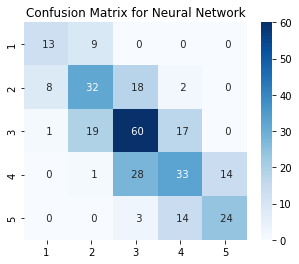

In [2320]:
plot_conf_matrix(y_test.values,y_pred,unique_class_label, title="Confusion Matrix for Neural Network" )

In [2321]:
print("Accuracy Score for " +  model.__class__.__name__ + "  " 
        + str(accuracy_score(y_test.values,y_pred)) )
print("F1 Score for " + model.__class__.__name__ + "  " + 
        str(f1_score(y_test.values, y_pred, average='weighted')))

Accuracy Score for Sequential  0.5472972972972973
F1 Score for Sequential  0.5455261068447629


In [2322]:
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)

In [2323]:
from keras.models import save_model
model_weights = save_model(model, '/content/model_weights.hdf5')

#### Performing testing using Loaded model

In [2324]:
with open('model.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_47", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_188_input"}}, {"class_name": "Dense", "config": {"name": "dense_188", "trainable": true, "batch_input_shape": [null, 16], "dtype": "float32", "units": 11, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_189", "trainable": true, "dtype": "float32", "units": 11, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer"

In [2325]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('model_weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [2326]:
y_pred_loaded = network_loaded.predict(X_test_scaled)

In [2327]:
y_pred_loaded = np.argmax(y_pred_loaded, axis=1)

In [2328]:
y_pred_loaded +=1

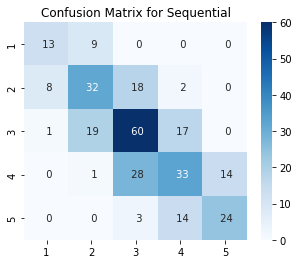

In [2329]:
plot_conf_matrix(y_test.values,y_pred_loaded,unique_class_label, title="Confusion Matrix for " + model.__class__.__name__)

#### Prediction on Asia Developed Dataset

In [2330]:
asia_df = pd.read_csv("/content/sample_data/Asia_Developed.csv").set_index("SecId")
asia_df = morningStarUtilities.createSize_InvestmentTypeFeature(asia_df)


In [2331]:
asia_df[asia_df.FundTNAV.isnull()]

,Name,StarRatingM255,SustainabilityRank,CategoryName,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,GBRReturnM60,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,EquityStyleBox,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F00001071Q,BIEF Emerging Markets A GBP Acc,4,2,Global Emerging Markets Equity,0.62047,1.43,1.64,-3.35,-7.72,0.09,10.79,10.05,NaN,NaN,1.12,1.17,24.08,NaN,2,28614.24791,4,2.47,1.02,89.7,16.24,0.66,3,1,3.0,False,1,2


In [2332]:
asia_df.drop(index='F00001071Q',inplace=True)


In [2333]:
X_asia = asia_df[imp_features]
y_asia = asia_df['StarRatingM255']
X_asia_scaled = scaler.transform(X_asia)

In [2334]:
y_asia_pred = network_loaded.predict(X_asia_scaled)
y_asia_pred = np.argmax(y_asia_pred, axis=1)
y_asia_pred += 1

In [2335]:
y_asia.shape

(432,)

In [2336]:
y_asia_pred.shape

(432,)

In [2337]:
print("Accuracy Score for " +  model.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia.values,y_asia_pred)) )
print("F1 Score for " + model.__class__.__name__ + "  " + 
        str(f1_score(y_asia.values, y_asia_pred, average='weighted')))

Accuracy Score for Sequential  0.5046296296296297
F1 Score for Sequential  0.48188086612310466


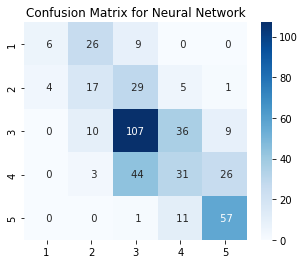

In [2338]:
plot_conf_matrix(y_asia.values,y_asia_pred,unique_class_label, title="Confusion Matrix for Neural Network" )